# Chapter 09 텍스트를 위한 인공 신경망

## 09-1 순차 데이터와 순환 신경망

### 순차 데이터
* 텍스트난 시계열 데이터와 같이 순서에 의미가 있는 데이터를 말함.
* 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요
* 입력 데이터의 흐름이 앞으로만 전달되는 신경망은 피드포워드 신경망(FFNN)


### 순환 신경망
* 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가
* 샘플을 처릴하는 한 단계를 타임스텝
* 층을 셀이라 부름
* 셀의 출력을 은닉 상태라고 부름
* 은닉층의 활성화 함수로 tanh를 많이 사용함



### 셀의 가중치와 입출력


## 09-2 순환 신경망으로 IMDB 리뷰 분류하기

### IMDB 리뷰 데이터셋
* 데이터에 고유한 정수 부여(정수에 의미는 없음)
* 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점 삭제 후 공백을 기준으로 분리
* 분리된 단어를 토큰이라함
* 특정하 용도로 예약된 정수들도 있음


In [ ]:
# 이미 정수로 바껴있는 데이터 불러오기
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)   # 단어 500개만 사용

print(train_input.shape, test_input.shape)   # <-- 파이썬 객체를 담은 넘파이 배열

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))

print(train_input[0])

# 타깃 데이터
print(train_target[:20])   # 0(부정)과 1(긍정)

# 검증 세트
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


239.00925 178.0


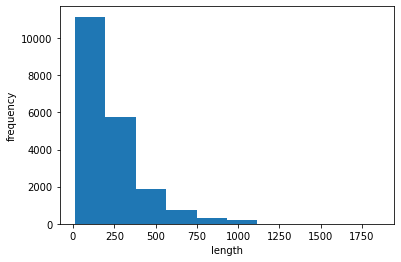

In [ ]:
# 각 리뷰 길이
import numpy as np
lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)   # 2차원 배열로 바뀜 # 앞부분을 없앰

print(train_seq.shape)  

print(train_seq[0])

print(train_input[0][-10:])

print(train_seq[5])

val_seq = pad_sequences(val_input, maxlen=100)

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


### 순환 신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)

print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)

model.summary()

(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 72ms/step - loss: 0.7000 - accuracy: 0.5010 - val_loss: 0.6962 - val_accuracy: 0.5116
Epoch 2/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6958 - accuracy: 0.5123 - val_loss: 0.6938 - val_accuracy: 0.5186
Epoch 3/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6929 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5230
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6905 - accuracy: 0.5315 - val_loss: 0.6904 - val_accuracy: 0.5326
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6883 - accuracy: 0.5393 - val_loss: 0.6888 - val_accuracy: 0.5374
Epoch 6/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6862 - accuracy: 0.5507 - val_loss: 0.6873 - val_accuracy: 0.5474
Epoch 7/100
313/313 [==============================] - 22s 70ms/step - loss: 0.6839 - accuracy: 0.5590 - val_loss: 0.6855 - val_ac

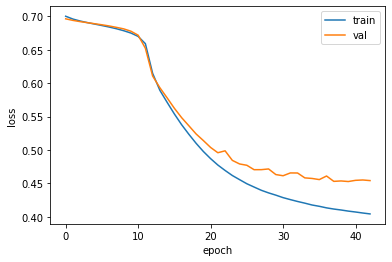

8000000 4000000000


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 데이터 크기
print(train_seq.nbytes, train_oh.nbytes)

### 단어 임베딩을 사용하기
* 각 단어를 고정된 크기의 실수 벡터로 바꿔줌.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

# 훈련
rmprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 27s 83ms/step - loss: 0.6946 - accuracy: 0.5063 - val_loss: 0.6876 - val_accuracy: 0.5540
Epoch 2/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6771 - accuracy: 0.6064 - val_loss: 0.6695 - val_accuracy: 0.6382
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6594 - accura

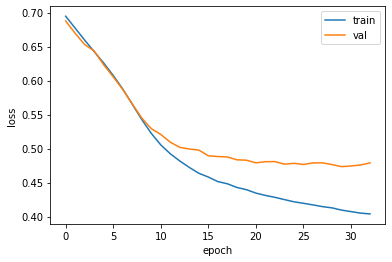

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 09-3 LSTM과 GRU 셀

### LSTM 구조
* 단기 기억을 오래 기억하기 위해 고안
* [관련 글](https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr)
* 삭제, 입력, 출력 게이트가 존재

### LSTM 신경망 훈련하기


In [3]:
# 데이터 불러오기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# LSTM
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100)) # 500은 어휘사전의 크기
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 11s 9ms/step - loss: 0.6923 - accuracy: 0.5453 - val_loss: 0.6910 - val_accuracy: 0.6110
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6885 - accuracy: 0.6348 - val_loss: 0.6845 - val_accuracy: 0.6592
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6690 - accuracy: 0

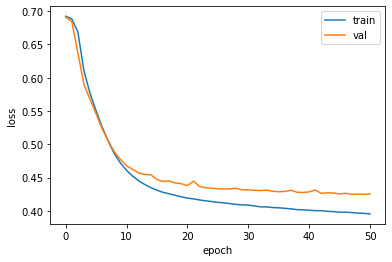

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환층에 드롭아웃 적용하기
* SimpleRNN과 LSTM 클래스 모두 자체적으로 드롭아웃 기능 제공
* dropout 과 recurrent_dropout
* recurrent_dropout은 기술적 문제로 GPU 사용이 불가

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

# model2.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-drop-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6926 - accuracy: 0.5224 - val_loss: 0.6920 - val_accuracy: 0.5506
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6904 - accuracy: 0.5890 - val_loss: 0.6888 - val_accuracy: 0.6312
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6850 - accuracy: 0.6450 - val_loss: 0.6795 - val_accuracy: 0.6786
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6578 - accuracy: 0.6981 - val_loss: 0.6206 - val_accuracy: 0.7194
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6002 - accuracy: 0.7137 - val_loss: 0.5841 - val_accuracy: 0.7204
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5730 - accuracy: 0.7296 - val_loss: 0.5581 - val_accuracy: 0.7454
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5476 - accuracy: 0.7519 - val_loss: 0.5353 - val_accuracy: 0.757

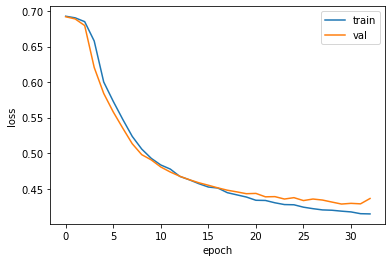

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 2개의 층을 연결하기
* 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
* 따라서 마지막 순환층을 제외하고는 모든 타임스텝에 대한 은닉 상태를 출력 해야함

In [9]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary() # 첫 번째 LSTM은 모든 타임스텝의 은닉 상태를 출력하기 때문에 출력 크기가 (None, 100, 8)

# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 100, 8)            800       
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 7s 15ms/step - loss: 0.6925 - accuracy: 0.5422 - val_loss: 0.6918 - val_accuracy: 0.5962
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6895 - accuracy: 0.6138 - va

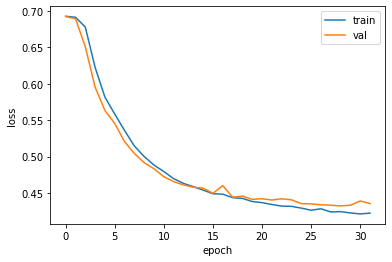

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### GRU 구조
* [자료](https://yjjo.tistory.com/18)

### GRU 신경망 훈련하기

In [4]:
from tensorflow import keras

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

# 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru_2 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 11s 9ms/step - loss: 0.6930 - accuracy: 0.5070 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6912 - accuracy: 0.5645 - val_loss: 0.6907 - val_accuracy: 0.5630
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6885 - accuracy: 0

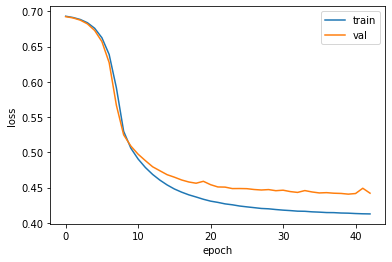

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
# test
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 5ms/step - loss: 0.4276 - accuracy: 0.7984


[0.4276365637779236, 0.7984399795532227]